**bt - Backtesting flexible para Python**

**¿Qué es bt?**
bt es un marco de trabajo flexible de backtesting para Python, utilizado para probar estrategias de trading cuantitativas. El backtesting es el proceso de probar una estrategia en un conjunto de datos. Este marco permite crear estrategias que combinan diferentes Algos. El objetivo es fomentar la creación de bloques de lógica de estrategia que sean fáciles de probar, reutilizables y flexibles, para facilitar el desarrollo rápido de estrategias complejas.

El objetivo principal es permitir que los quants se enfoquen en el desarrollo de estrategias en lugar de reinventar la rueda.

bt está codificado en Python y forma parte de un ecosistema vibrante y rico para el análisis de datos. Existen numerosas bibliotecas para machine learning, procesamiento de señales y estadísticas, que se pueden aprovechar para evitar la reinvención de la rueda, lo que ocurre con frecuencia en otros lenguajes sin tantos proyectos de código abierto de alta calidad.

bt se construye sobre ffn, una biblioteca de funciones financieras para Python.

**Ejemplo Rápido**
Aquí un vistazo rápido de bt:

https://pmorissette.github.io/bt/


In [1]:
pip install bt

In [2]:
import bt
%matplotlib inline

**Un backtest de estrategia simple**
Vamos a crear una estrategia simple. Crearemos una estrategia de solo posiciones largas que se rebalancea mensualmente, colocando pesos iguales en cada activo de nuestro universo.

Primero, descargamos algunos datos. Por defecto, `bt.get` (alias de `ffn.get`) descarga el 'Adjusted Close' de Yahoo! Finance. Descargaremos datos desde el 1 de enero de 2010 para esta demostración.

In [13]:
# obtener algunos datos
data = bt.get('spy,agg', start='2010-01-01')
print(data.head())


                  spy        agg
Date                            
2010-01-04  86.580750  69.574364
2010-01-05  86.809921  69.890900
2010-01-06  86.871063  69.850494
2010-01-07  87.237747  69.769707
2010-01-08  87.528061  69.810112


Una vez obtenidos los datos, creamos nuestra estrategia. El objeto `Strategy` contiene la lógica de la estrategia, combinando diversos Algos.



In [14]:
# crear la estrategia
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

Finalmente, creamos un backtest, que es la combinación lógica de una estrategia con un conjunto de datos. Luego corremos el backtest y analizamos los resultados.



In [15]:
# crear y ejecutar un backtest
test = bt.Backtest(s, data)
res = bt.run(test)

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


**Análisis de los resultados**
El objeto `Result` es un contenedor de `ffn.GroupStats` que añade métodos útiles.



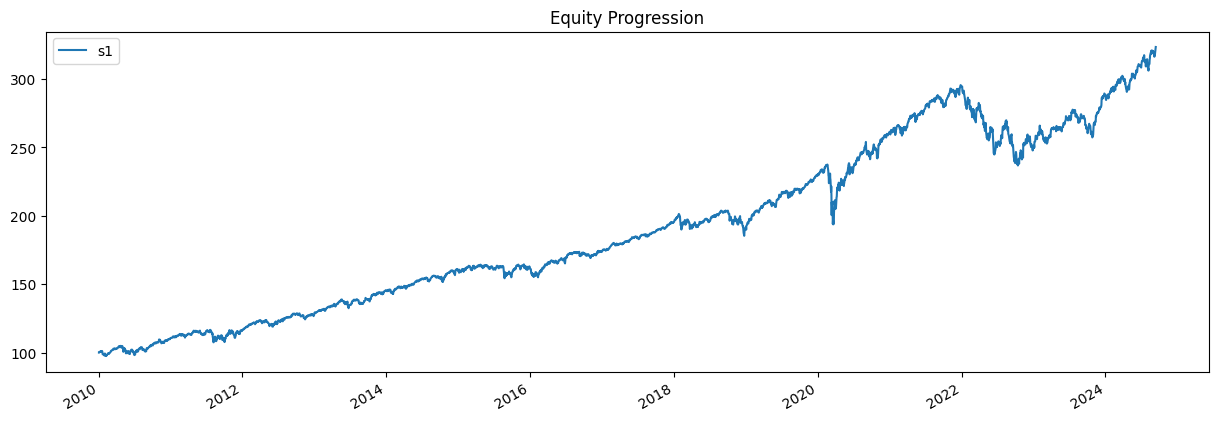

In [16]:
# mostrar curva de capital
res.plot();

In [17]:
# mostrar algunas estadísticas
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2024-09-13
Risk-free rate       0.00%

Total Return         223.23%
Daily Sharpe         0.95
Daily Sortino        1.48
CAGR                 8.31%
Max Drawdown         -19.87%
Calmar Ratio         0.42

MTD                  0.90%
3m                   4.66%
6m                   8.06%
YTD                  12.11%
1Y                   18.87%
3Y (ann.)            4.18%
5Y (ann.)            8.09%
10Y (ann.)           7.65%
Since Incep. (ann.)  8.31%

Daily Sharpe         0.95
Daily Sortino        1.48
Daily Mean (ann.)    8.38%
Daily Vol (ann.)     8.78%
Daily Skew           -0.71
Daily Kurt           13.78
Best Day             4.77%
Worst Day            -6.63%

Monthly Sharpe       1.04
Monthly Sortino      1.91
Monthly Mean (ann.)  8.49%
Monthly Vol (ann.)   8.13%
Monthly Skew         -0.35
Monthly Kurt         1.06
Best Month           7.57%
Worst Month          -6.68%

Yearly Shar

Para visualizar la distribución de retornos:

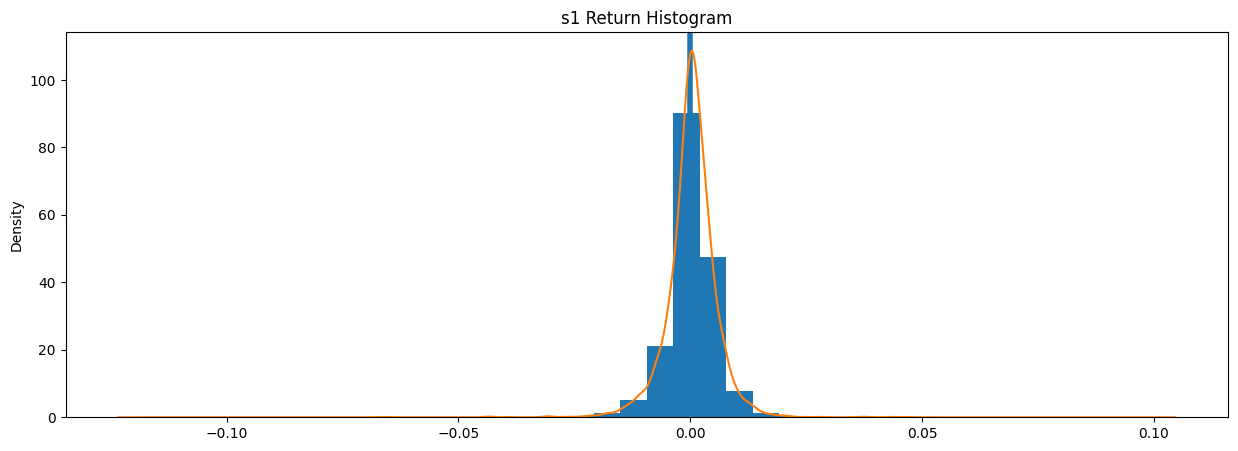

In [18]:
res.plot_histogram()

Para verificar los pesos de los activos a lo largo del tiempo:

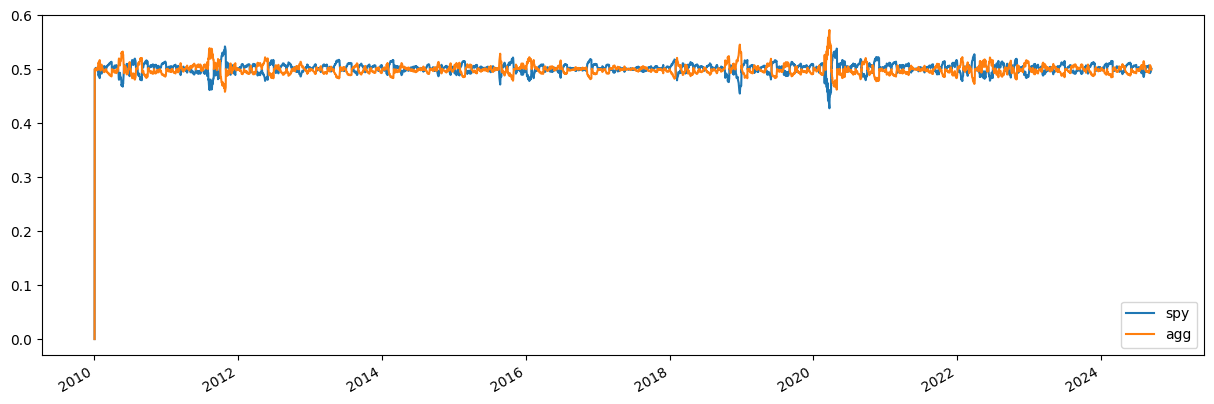

In [19]:
res.plot_security_weights()


**Modificación de la Estrategia**
Si quisiéramos ejecutar la estrategia semanalmente y usar un enfoque de risk parity (pesos proporcionales a la inversa de la volatilidad de cada activo), lo único que debemos hacer es cambiar los Algos:

In [20]:
# crear nueva estrategia
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

Luego probamos con el mismo conjunto de datos y comparamos los resultados:

  0%|          | 0/2 [00:00<?, ?it/s]c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version th

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2024-09-13  2024-09-13
Risk-free rate       5.50%       5.50%

Total Return         223.23%     105.11%
Daily Sharpe         0.34        -0.06
Daily Sortino        0.53        -0.10
CAGR                 8.31%       5.01%
Max Drawdown         -19.87%     -18.01%
Calmar Ratio         0.42        0.28

MTD                  0.90%       1.40%
3m                   4.66%       4.75%
6m                   8.06%       7.34%
YTD                  12.11%      10.33%
1Y                   18.87%      16.58%
3Y (ann.)            4.18%       2.28%
5Y (ann.)            8.09%       4.77%
10Y (ann.)           7.65%       4.71%
Since Incep. (ann.)  8.31%       5.01%

Daily Sharpe         0.34        -0.06
Daily Sortino        0.53        -0.10
Daily Mean (ann.)    8.38%       5.03%
Daily Vol (ann.)     8.78%       5.13%
Daily Skew           -0.71       -1.05
Daily

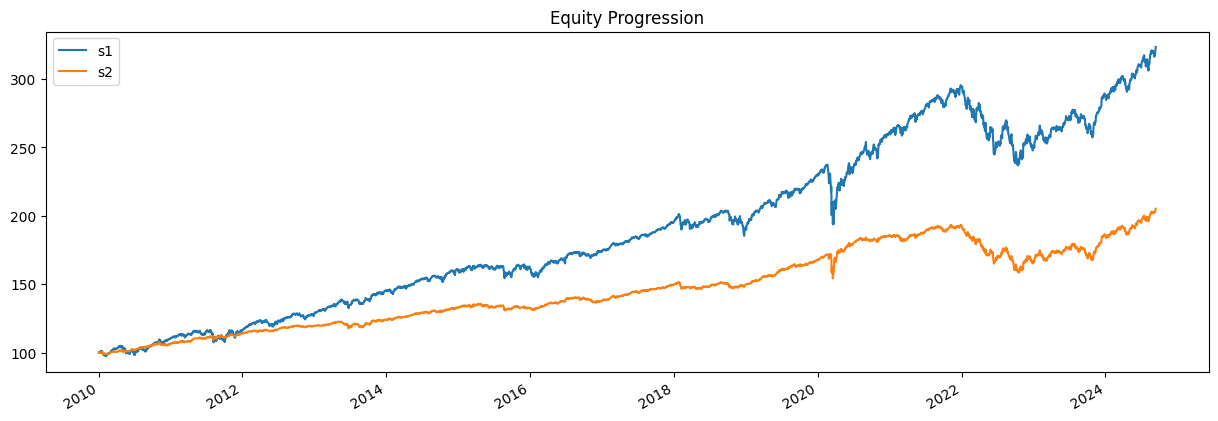

In [21]:
test2 = bt.Backtest(s2, data)
res2 = bt.run(test, test2)
res2.set_riskfree_rate(0.055)
res2.plot();
res2.display()

**Características de bt**
- **Estructura de árbol**: Permite construir estrategias modulares y reutilizables.
- **Stacks de algoritmos**: Facilitan la creación de lógica modular y reutilizable para estrategias.
- **Modelado de costos de transacción**: Simula comisiones y spreads.
- **Bonos e instrumentos de renta fija**: Soporta instrumentos con cupones y swaps.
- **Gráficos y reportes**: Proporciona gráficos para visualizar resultados de backtests.

**Roadmap**
En el futuro, se enfocará en:
1. **Velocidad**: Mejorar el rendimiento.
2. **Más algoritmos**: Desarrollar y permitir la contribución de nuevos algos.
3. **Reportes y gráficos**: Mejorar continuamente las herramientas de reporte y visualización.

### FUNCIONES

BT (Backtesting):

1. bt.Strategy(): Crea una estrategia de inversión combinando diferentes algoritmos.

2. bt.Backtest(): Combina una estrategia con un conjunto de datos para realizar un backtesting.

3. bt.run(): Ejecuta uno o varios backtests.

4. Result.plot(): Genera un gráfico de la curva de equity del backtest.

5. Result.display(): Muestra estadísticas detalladas del resultado del backtest.

6. Result.plot_histogram(): Genera un histograma de los retornos.

7. Result.plot_security_weights(): Muestra la evolución de los pesos de los activos en la cartera.

8. bt.algos.RunMonthly()/RunWeekly(): Configura la frecuencia de ejecución de la estrategia.

9. bt.algos.SelectAll(): Selecciona todos los activos disponibles.

10. bt.algos.WeighEqually()/WeighInvVol(): Asigna pesos a los activos (equitativamente o inversamente proporcional a la volatilidad).

11. bt.algos.Rebalance(): Rebalancea la cartera según los pesos calculados.